In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and clean the data
file_path = r"C:\Users\riya kansal\Desktop\2016.xlsx"
data = pd.read_excel(file_path)
data.columns = data.columns.str.strip()

# Handle missing values
data.dropna(subset=['NDVI1', 'MaxTemp1', 'MinTemp1'], inplace=True)
data.fillna(data.mean(), inplace=True)

# Define the feature columns and target columns for all fortnights
feature_columns = []
target_columns = []
for i in range(1, 9):
    feature_columns.extend([
        f'MaxTemp{i}', f'MinTemp{i}', 
        f'DaysMaxTempAbove16{i}', f'DaysMaxTempAbove18{i}', f'DaysMaxTempAbove20{i}', f'DaysMaxTempAbove24{i}',
        f'DaysMinTempBelow16{i}', f'DaysMinTempBelow18{i}', f'DaysMinTempBelow20{i}', f'DaysMinTempBelow24{i}',
        f'Percentile90_Max{i}', f'Percentile90_Min{i}'
    ])
    target_columns.append(f'NDVI{i}')

# Filter out the available columns in the dataset
feature_columns = [col for col in feature_columns if col in data.columns]
target_columns = [col for col in target_columns if col in data.columns]

# Ensure that we have features and targets
if not feature_columns or not target_columns:
    raise ValueError("No valid features or targets found in the dataset.")

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[feature_columns])

# Dimensionality reduction with PCA (retaining 95% of variance instead of 99%)
pca = PCA(n_components=0.95)  # Retain 95% of variance
scaled_features_pca = pca.fit_transform(scaled_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features_pca, data[target_columns], test_size=0.2, random_state=42)

# Define the model and hyperparameter grid for SVR
base_model = SVR()
model = MultiOutputRegressor(base_model)

param_dist = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1],
    'estimator__kernel': ['linear', 'rbf']
}

# Use RandomizedSearchCV for hyperparameter tuning with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Calculate overall metrics for each target
overall_rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values')).mean()
overall_r2 = r2_score(y_test, y_pred, multioutput='uniform_average')

print(f'Overall RMSE: {overall_rmse}')
print(f'Overall R² Score: {overall_r2}')


Overall RMSE: 0.062208583752360304
Overall R² Score: 0.4829171571617656


Loading data...
Data loaded. Time taken: 6.84 seconds
Handling missing values...
Missing values handled. Time taken: 0.03 seconds
Defining feature and target columns...
Feature and target columns defined. Time taken: 0.00 seconds
Scaling features...
Features scaled. Time taken: 0.02 seconds
Splitting data into training and testing sets...
Data split. Time taken: 0.00 seconds
Building the LSTM model...
LSTM model built. Time taken: 0.12 seconds
Training the LSTM model...
Epoch 1/200


C:\Users\riya kansal\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4567Epoch 1 completed with loss: 2.8357 and val_loss: 0.6898
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 4.4141 - val_loss: 0.6898 - learning_rate: 0.0010
Epoch 2/200
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4509Epoch 2 completed with loss: 0.2776 and val_loss: 0.0823
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4334 - val_loss: 0.0823 - learning_rate: 0.0010
Epoch 3/200
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0593Epoch 3 completed with loss: 0.0419 and val_loss: 0.0207
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0577 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 4/200
66/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168Epoch 4 completed with loss: 0.0143 and val_loss: 0.0110
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 5/200
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102Epoch 5 completed with loss: 0.0094 and val_loss: 0.0090
75/75 ━━━━━━━

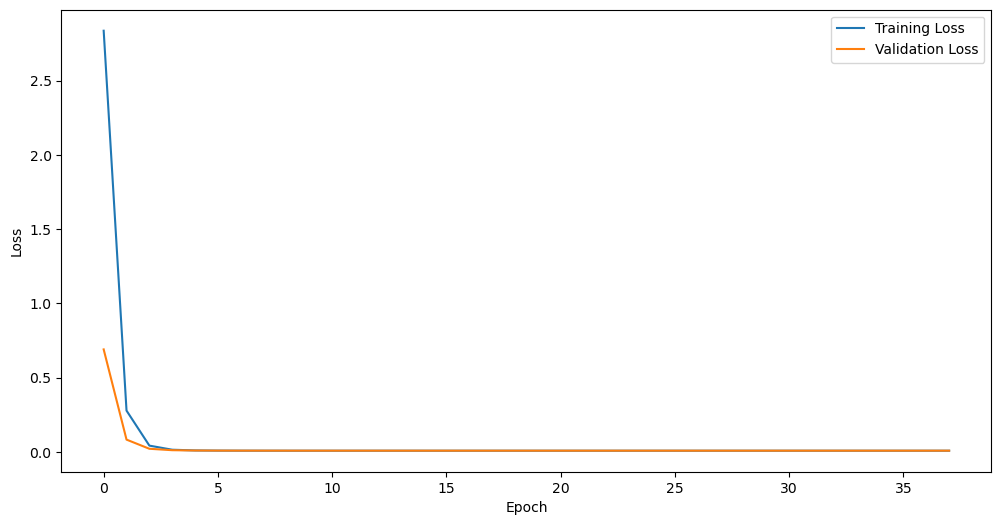

Evaluating the LSTM model on the training set...
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training R² Score: -3.26044791126856e-05
Evaluation on training set completed. Time taken: 0.92 seconds
Evaluating the LSTM model on the test set...
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Overall RMSE on Test Set: 0.0870687724769314
Overall R² Score on Test Set: -0.00015453103840462612
Evaluation on test set completed. Time taken: 0.70 seconds


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization, GRU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from keras.optimizers import Adam
import time
import matplotlib.pyplot as plt

# Load and preprocess the data
start_time = time.time()
print("Loading data...")
file_path = r"C:\Users\riya kansal\Desktop\2016.xlsx"
data = pd.read_excel(file_path)
data.columns = data.columns.str.strip()
print(f"Data loaded. Time taken: {time.time() - start_time:.2f} seconds")

# Handle missing values
print("Handling missing values...")
start_time = time.time()
data.dropna(subset=['NDVI1', 'MaxTemp1', 'MinTemp1'], inplace=True)
data.fillna(data.mean(), inplace=True)
print(f"Missing values handled. Time taken: {time.time() - start_time:.2f} seconds")

# Define feature and target columns
print("Defining feature and target columns...")
start_time = time.time()
feature_columns = []
target_columns = []
for i in range(1, 9):
    feature_columns.extend([
        f'MaxTemp{i}', f'MinTemp{i}', 
        f'DaysMaxTempAbove16{i}', f'DaysMaxTempAbove18{i}', f'DaysMaxTempAbove20{i}', f'DaysMaxTempAbove24{i}',
        f'DaysMinTempBelow16{i}', f'DaysMinTempBelow18{i}', f'DaysMinTempBelow20{i}', f'DaysMinTempBelow24{i}',
        f'Percentile90_Max{i}', f'Percentile90_Min{i}'
    ])
    target_columns.append(f'NDVI{i}')
print(f"Feature and target columns defined. Time taken: {time.time() - start_time:.2f} seconds")

# Scale features
print("Scaling features...")
start_time = time.time()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[feature_columns])
X = scaled_features
y = data[target_columns].values
print(f"Features scaled. Time taken: {time.time() - start_time:.2f} seconds")

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split. Time taken: {time.time() - start_time:.2f} seconds")

# Reshape the data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model with GRU layer and additional regularization
print("Building the LSTM model...")
start_time = time.time()
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='relu', kernel_regularizer='l2'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))
model.add(GRU(64, return_sequences=True, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(len(target_columns)))  # Output layer with number of target columns
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
print(f"LSTM model built. Time taken: {time.time() - start_time:.2f} seconds")

# Define callbacks
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} completed with loss: {logs.get('loss'):.4f} and val_loss: {logs.get('val_loss'):.4f}")

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
custom_callback = CustomCallback()

# Train the model
print("Training the LSTM model...")
start_time = time.time()
try:
    history = model.fit(X_train_reshaped, y_train, epochs=200, batch_size=64, validation_split=0.2,
                        callbacks=[early_stopping, reduce_lr, custom_callback], verbose=1)
except Exception as e:
    print(f"An error occurred: {e}")
print(f"Model training completed. Time taken: {time.time() - start_time:.2f} seconds")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the training set
print("Evaluating the LSTM model on the training set...")
start_time = time.time()
y_train_pred = model.predict(X_train_reshaped)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R² Score: {train_r2}')
print(f"Evaluation on training set completed. Time taken: {time.time() - start_time:.2f} seconds")

# Evaluate the model on the test set
print("Evaluating the LSTM model on the test set...")
start_time = time.time()
y_test_pred = model.predict(X_test_reshaped)
test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
test_r2 = r2_score(y_test, y_test_pred)
print(f'Overall RMSE on Test Set: {test_rmse}')
print(f'Overall R² Score on Test Set: {test_r2}')
print(f"Evaluation on test set completed. Time taken: {time.time() - start_time:.2f} seconds")
